## Excercise 24

In [55]:
import math
import numpy as np


In [91]:
 def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Softmax(net_one , net):
    #O = softmax(net)  softmax(xi)= e**Xi / sum(e**Xj)
    Sum_e_Xj = 0
    for el in net:
        Sum_e_Xj += math.exp(el)
    return(round(math.exp(net_one) / Sum_e_Xj, 4))

def relu(x):
    if x>= 0:
        return x
    else:
        return 0

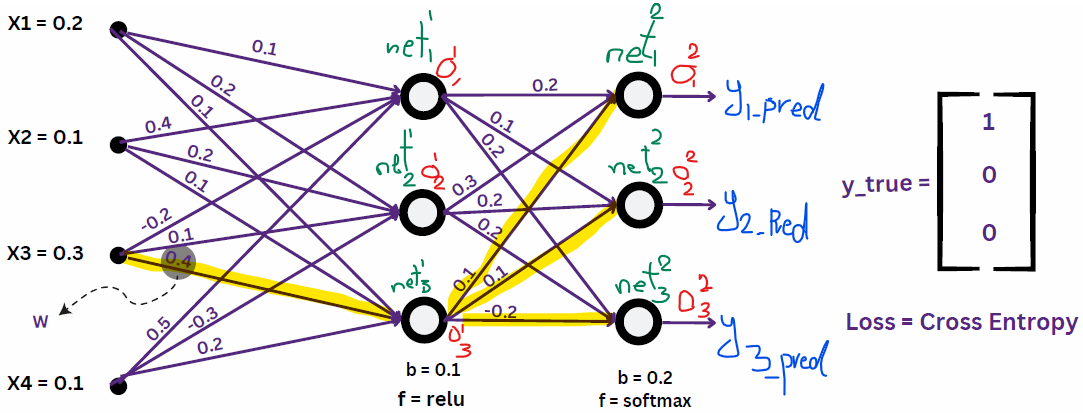

### Layer1 : 

In [65]:
net_1_1 = round((0.1*0.2 + 0.4*0.1 - 0.2*0.3 + 0.5*0.1) + 0.1 , 2)
print ('net_1_1 is :' , net_1_1)

#O_1_1 = relu(net_1_1) relu(x)=x if x> 0   ==>  O_1_1 = net_1_1
O_1_1 = relu(net_1_1)
print ('  O_1_1 is :', O_1_1)

net_1_1 is : 0.15
  O_1_1 is : 0.15


In [66]:
net_1_2 = round((0.2*0.2 + 0.2*0.1 + 0.1*0.3 - 0.3*0.1) + 0.1 , 2)
print ('net_1_2 is :' , net_1_2)

#O_1_2 = relu(net_1_2) relu(x)=x if x> 0   ==>  O_1_2 = net_1_2
O_1_2 = relu(net_1_2)
print ('  O_1_2 is :', O_1_2)

net_1_2 is : 0.16
  O_1_2 is : 0.16


In [67]:
 net_1_3 = round((0.1*0.2 + 0.1*0.1 + 0.4*0.3 + 0.2*0.1) + 0.1 , 2)
print ('net_1_3 is :' , net_1_3)

#O_1_3 = relu(net_1_3) relu(x)=x if x> 0   ==>  O_1_3 = net_1_3
O_1_3 = relu(net_1_3)
print ('  O_1_3 is :', O_1_3)

net_1_3 is : 0.27
  O_1_3 is : 0.27


### Layer2 : 

In [93]:
net_2_1 = round((0.2*O_1_1 + 0.3*O_1_2 + 0.1*O_1_3) + 0.2 , 2)
print ('net_2_1 is :' , net_2_1)

net_2_2 = round((0.1*O_1_1 + 0.2*O_1_2 + 0.1*O_1_3) + 0.2 , 2)
print ('net_2_2 is :' , net_2_2)

net_2_3 = round((0.2*O_1_1 + 0.2*O_1_2 - 0.2*O_1_3) + 0.2 , 2)
print ('net_2_3 is :' , net_2_3)

print ('-----------------------------------')

net_2_Mattix = [net_2_1 , net_2_2 , net_2_3]
O_2_1 = Softmax(net_2_1 , net_2_Mattix)
O_2_2 = Softmax(net_2_2 , net_2_Mattix)
O_2_3 = Softmax(net_2_3 , net_2_Mattix)
 
print ('  O_2_1 is :', O_2_1)
print ('  O_2_2 is :', O_2_2)
print ('  O_2_3 is :', O_2_3)

net_2_1 is : 0.31
net_2_2 is : 0.27
net_2_3 is : 0.21
-----------------------------------
  O_2_1 is : 0.349
  O_2_2 is : 0.3353
  O_2_3 is : 0.3158


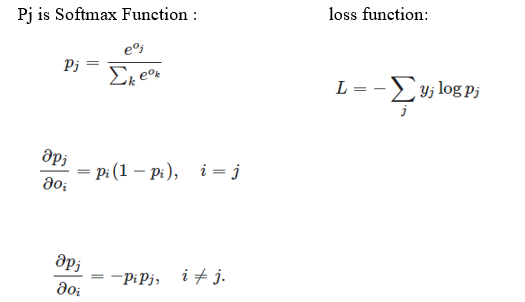

In [98]:
# Loss = L = - Sum(yi_True log(yi_Pred)) ==> L=-log(y1_pred), if L=-log(x) --> ∂L/∂x=-1/(x ln10) 
# ∂L/∂y1_pred = -1/(y1_pred * ln 10) 
# ∂L/∂y2_pred = 0
# ∂L/∂y3_pred = 0
Derivation_L_y1_pred = -1/(y1_pred * math.log(10))
 

In [101]:
y1_pred = O_2_1
y2_pred = O_2_2
y3_pred = O_2_3

In [102]:
# w_new = [(∂L/∂y1_pred * ∂y1_pred/∂O_2_1 * ∂O_2_1/∂net_2_1 * ∂net_2_1/∂O_1_3)  +  
#          (∂L/∂y2_pred * ∂y2_pred/∂O_2_2 * ∂O_2_2/∂net_2_2 * ∂net_2_2/∂O_1_3)  +  
#          (∂L/∂y3_pred * ∂y3_pred/∂O_2_3 * ∂O_2_3/∂net_2_3 * ∂net_2_3/∂O_1_3)  ] [∂O_1_3/∂net1_3 * ∂net1_3/∂w]

In [103]:
#∂O_2_1/∂net_2_1:
# Note : ∂softmax(x(i))/∂x(j) = softmax(x(i)) * (δ(i,j) - softmax(x(j))) ,δ(i,j) is equals 1 if i=j and 0 otherwise.
# ∂O_2_1/∂net_2_1 = ∂softmax(net_2_1)/∂net_2_1 = softmax(net_2_1) * (1 - softmax(net_2_1)) 
Derivation_O_2_1_net_2_1 = round(Softmax(net_2_1,net_2_Mattix) * (1- Softmax(net_2_1,net_2_Mattix)),4)

In [104]:
#∂O_1_3/∂net1_3 : ∂Relu(net1_3)/@net1_3 , Relu(x)=x if x>= 0 so ∂Relu(x)/∂x=1 , net1_3>0 --> ∂Relu(net1_3)/∂net1_3 = 1 

In [106]:
w_new = round(((Derivation_L_y1_pred * 1 * Derivation_O_2_1_net_2_1 * 0.1) + (0) + (0)) / (1 * 1),4)
print('new amount for desired Weight w is :' , w_new)

new amount for desired Weight w is : -0.0283


### Finished!